DATA-DRIVEN APPROACH TO OPTIMISE ELEVATOR USAGE TO CONSERVE ENERGY

PROGRAM INTENDED OUTPUT.

A. Calculate new elevator journey time column.

B. Pattern recognition and usage trends.
   
   1. Show Top 10 most usage between floors: (a) calling floor (b) destination floor.
   2.Show the peak period of each day across the week.
   3. Get the peak day of the week based on elevator usage and ranked.
   
C. Energy Usage Optimisation Strategies Development.

   1. Prioritising Energy Efficient Floors.
   2. Optimised Peak Hours Smart Scheduling: (a) Peak Hours Usage (b) Smart Scheduling for Peak Hours.
   3. Model

DATA PREPARATION: Data Collection and Analysis

In [1]:
import pandas as pd
import plotly.express as px
import numpy as np
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

elevator_1 = pd.read_csv("ELEVATOR_1.csv")
elevator_2 = pd.read_csv("ELEVATOR_2.csv")
elevator_3 = pd.read_csv("ELEVATOR_3.csv")
elevator_4 = pd.read_csv("ELEVATOR_4.csv")

In [2]:
# This shows the number of rows and columns of the data 
print("Shape of elevator_1: ", elevator_1.shape)
print("Shape of elevator_2: ", elevator_2.shape)
print("Shape of elevator_3: ", elevator_3.shape)
print("Shape of elevator_4: ", elevator_4.shape)

Shape of elevator_1:  (317, 9)
Shape of elevator_2:  (408, 9)
Shape of elevator_3:  (386, 9)
Shape of elevator_4:  (409, 9)


In [3]:
# Concatenating the data into a single dataframe and removing space in columns names
elevator = pd.concat([elevator_1, elevator_2, elevator_3, elevator_4])
elevator.index = range(1, len(elevator) + 1)
elevator.columns = elevator.columns.str.strip()

elevator

,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date
1,1,0,06:39:18,0,06:39:18,12,06:40:23,Wednesday,22/05/2019
2,1,0,07:12:18,12,07:13:06,16,07:14:27,Wednesday,22/05/2019
3,1,0,07:43:32,11,07:44:16,9,07:45:15,Wednesday,22/05/2019
4,1,0,07:49:30,18,07:50:42,12,07:51:47,Wednesday,22/05/2019
5,1,0,07:55:32,12,07:56:20,7,07:57:05,Wednesday,22/05/2019
...,...,...,...,...,...,...,...,...,...
1516,4,6,18:53:36,0,18:54:00,0,18:54:41,Tuesday,28/05/2019
1517,4,15,19:00:07,0,19:01:07,0,19:02:24,Tuesday,28/05/2019
1518,4,11,19:09:02,0,19:09:46,0,19:10:47,Tuesday,28/05/2019
1519,4,0,19:40:58,0,19:40:58,10,19:41:55,Tuesday,28/05/2019


In [4]:
elevator.dtypes.reset_index()

,index,0
0,Elevator Type,int64
1,Calling Floor,int64
2,Calling Time,object
3,Resting Floor,int64
4,Calling Arrive Time,object
5,Destination Floor,int64
6,Destination Arrive Time,object
7,Day of the Week,object
8,Date,object


A. CALCULATING JOURNEY TIME

In [5]:
# Converting string columns to datetime objects
time_columns = ['Calling Time', 'Calling Arrive Time', 'Destination Arrive Time']
for column in time_columns:
    elevator[column] = pd.to_datetime(elevator[column], format='%H:%M:%S').dt.time

# Calculating the Journey Time
elevator['Journey Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Destination Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']), axis=1)

elevator

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\2532216855.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  elevator['Journey Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Destination Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']), axis=1)


,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time
1,1,0,06:39:18,0,06:39:18,12,06:40:23,Wednesday,22/05/2019,0 days 00:01:05
2,1,0,07:12:18,12,07:13:06,16,07:14:27,Wednesday,22/05/2019,0 days 00:01:21
3,1,0,07:43:32,11,07:44:16,9,07:45:15,Wednesday,22/05/2019,0 days 00:00:59
4,1,0,07:49:30,18,07:50:42,12,07:51:47,Wednesday,22/05/2019,0 days 00:01:05
5,1,0,07:55:32,12,07:56:20,7,07:57:05,Wednesday,22/05/2019,0 days 00:00:45
...,...,...,...,...,...,...,...,...,...,...
1516,4,6,18:53:36,0,18:54:00,0,18:54:41,Tuesday,28/05/2019,0 days 00:00:41
1517,4,15,19:00:07,0,19:01:07,0,19:02:24,Tuesday,28/05/2019,0 days 00:01:17
1518,4,11,19:09:02,0,19:09:46,0,19:10:47,Tuesday,28/05/2019,0 days 00:01:01
1519,4,0,19:40:58,0,19:40:58,10,19:41:55,Tuesday,28/05/2019,0 days 00:00:57


B. PATTERN RECOGNITION AND USAGE TRENDS

1. Top 10 Most Usage Common Floor

In [6]:
# CALLING FLOOR

elevator_df = pd.DataFrame(elevator)

# column to analyse
cf = 'Calling Floor'
cf_values = elevator_df[cf]

# Count the occurrences of each value in the chosen column
column_counts = cf_values.value_counts()
highest_values = column_counts.head(10)

print(f"{cf} Counts:")
print(highest_values)

Calling Floor Counts:
0     720
2     103
11     86
12     70
10     63
4      59
16     57
19     57
15     48
13     46
Name: Calling Floor, dtype: int64


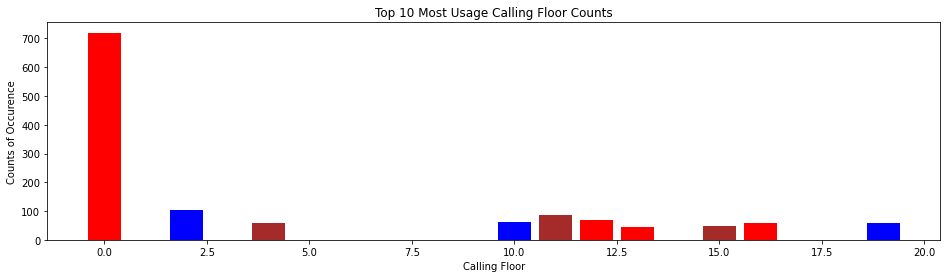

In [7]:
# Visualising the Top 10 most usage floor for elevator usage.
# Sorting the data by destination floor and count the number of times elevator arrive at each flooor.

# figure size
plt.figure(figsize=(16, 4))

# Define a list of colors for each bar created.
colours = ['red', 'blue', 'brown', 'red','blue','brown']

# Plotting bar chart
bar_color = 'red'
plt.bar(highest_values.index, highest_values.values, color = colours)
plt.xlabel(cf)
plt.ylabel('Counts of Occurence')
plt.title(f"Top 10 Most Usage {cf} Counts")

plt.show()

In [8]:
# DESTINATION FLOOR

# column to analyse
dsf = 'Destination Floor'
dsf_values = elevator_df[dsf]

# Count the occurrences of each value in the chosen column
column_counts = dsf_values.value_counts()
highest_values = column_counts.head(10)

print(f"{dsf} Counts:")
print(highest_values)

Destination Floor Counts:
0     799
2     114
12     73
11     72
10     59
16     57
19     51
4      46
6      39
5      37
Name: Destination Floor, dtype: int64


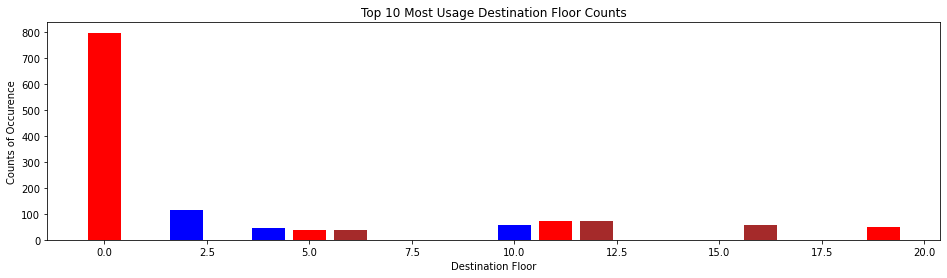

In [9]:
# Visualising the Top 10 most usage floor for elevator usage.
# Sorting the data by destination floor and count the number of times elevator arrive at each flooor.

# figure size
plt.figure(figsize=(16, 4))

# Define a list of colors for each bar
colours = ['red', 'blue', 'brown', 'red','blue','brown']

# Plotting bar chart
bar_color = 'red'
plt.bar(highest_values.index, highest_values.values, color = colours)
plt.xlabel(dsf)
plt.ylabel('Counts of Occurence')
plt.title(f"Top 10 Most Usage {dsf} Counts")

plt.show()

2. Peak Usage Hours: Monday - Sunday

In [10]:
# Filtering rows where the day of the week is Monday
mon_data = elevator_df[elevator_df["Day of the Week"] == "Monday"]

# Extracting hour time from the "Calling Time" column and count occurrences
time_counts = mon_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

9     14
11    12
13    12
12    11
15    10
16     9
10     8
14     8
17     8
8      4
18     4
19     4
7      1
Name: Calling Time, dtype: int64


In [11]:
# Filtering rows where the day of the week is Tuesday
tuesday_data = elevator_df[elevator_df["Day of the Week"] == "Tuesday"]

# Extracting the hour from the "Calling Time" column and count occurrences
time_counts = tuesday_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

12    32
11    29
17    27
18    26
13    25
14    24
9     20
16    19
10    16
19    16
8     13
15    13
7     11
6      5
Name: Calling Time, dtype: int64


In [12]:
# Filtering rows where the day of the week is Wednesday
wednesday_data = elevator_df[elevator_df["Day of the Week"] == "Wednesday"]

# Extracting the hour from the "Calling Time" column and count occurrences
time_counts = wednesday_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

12    48
11    47
17    32
18    32
10    31
9     30
14    26
13    25
16    23
15    20
8     15
7     13
19    11
6      4
Name: Calling Time, dtype: int64


In [13]:
# Filtering rows where the day of the week is Thursday
thursday_data = elevator_df[elevator_df["Day of the Week"] == "Thursday"]

# Extract the hour from the "Calling Time" column and count occurrences
time_counts = thursday_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

12    36
11    32
17    28
18    27
10    26
13    26
9     22
16    22
14    20
8     18
15    17
7     14
19    14
6      2
5      2
Name: Calling Time, dtype: int64


In [14]:
# Filtering rows where the day of the week is Friday
friday_data = elevator_df[elevator_df["Day of the Week"] == "Friday"]

# Extracting the hour from the "Calling Time" column and count occurrences
time_counts = friday_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

17    31
18    24
12    23
15    23
10    21
16    21
13    20
14    20
11    19
9     18
19    14
8     12
7      8
6      4
Name: Calling Time, dtype: int64


In [15]:
# Filtering rows where the day of the week is Saturday
saturday_data = elevator_df[elevator_df["Day of the Week"] == "Saturday"]

# Extracting the hour from the "Calling Time" column and count occurrences
time_counts = saturday_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

12    17
14    13
9     11
13    11
15     9
11     8
16     8
10     7
8      6
7      5
18     5
17     4
19     2
6      2
Name: Calling Time, dtype: int64


In [16]:
# Filtering rows where the day of the week is Sunday
sunday_data = elevator_df[elevator_df["Day of the Week"] == "Sunday"]

# Extract the hour from the "Calling Time" column and count occurrences
time_counts = sunday_data["Calling Time"].apply(lambda x: x.hour).value_counts()

print(time_counts)

13    14
9     13
12    13
11    12
14    10
15     9
16     8
17     8
8      6
10     6
18     5
19     4
7      2
Name: Calling Time, dtype: int64


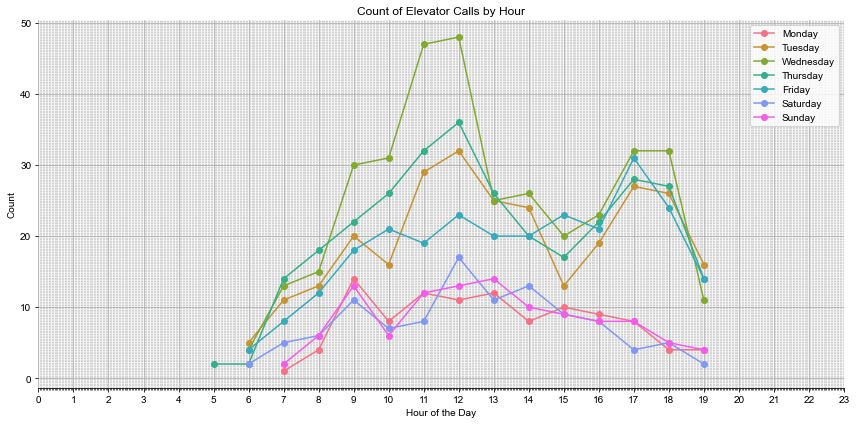

In [17]:
# Convert time columns to datetime objects
elevator_df['Calling Time'] = pd.to_datetime(elevator_df['Calling Time'], format='%H:%M:%S')

# Defining the days of the week
days_of_week = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Defining a colour palette with a unique colour for each day
colours = sns.color_palette('husl', len(days_of_week))

# Create a figure with subplots
fig, ax = plt.subplots(figsize=(12, 6))

# Iterate through the days and plot data
for i, day in enumerate(days_of_week):
    day_data = elevator_df[elevator_df["Day of the Week"] == day]
    time_counts = day_data["Calling Time"].apply(lambda x: x.hour).value_counts().sort_index()
    line_colour = colours[i]
    
    ax.plot(time_counts.index, time_counts.values, marker='o', color=line_colour, label=day)

ax.set_xlabel('Hour of the Day')
ax.set_ylabel('Count')
ax.set_title('Count of Elevator Calls by Hour')
ax.set_xticks(range(24))
ax.grid(True)
ax.legend(loc='upper right')

# Beautify the plot
sns.set_style("whitegrid")
sns.despine(left=True)

# Adding background colour
ax.set_facecolor('#f5f5f5')

# Adding minor grid lines
ax.xaxis.set_minor_locator(mdates.HourLocator(interval=1))
ax.xaxis.grid(True, which='minor', linestyle='--', linewidth=0.5)

# Adjust layout and spacing
plt.tight_layout()

# Show the combined plot
plt.show()


3. Busiest (Peak) Day of the Week Based on Elevator Call.

In [18]:
# MONDAY
# Count the occurrences of each elevator type on Monday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Monday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_monday = elevator_counts.sum()

print("Total Count Monday:", total_count_monday)
print(elevator_counts)

# TUESDAY
# Count the occurrences of each elevator type on Tuesday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Tuesday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_tuesday = elevator_counts.sum()

print("Total Count Tuesday:", total_count_tuesday)
print(elevator_counts)

# WEDNESDAY
# Count the occurrences of each elevator type on Wednesday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Wednesday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_wednesday = elevator_counts.sum()

print("Total Count Wednesday:", total_count_wednesday)
print(elevator_counts)

# THURSDAY
# Count the occurrences of each elevator type on Thursday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Thursday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_thursday = elevator_counts.sum()

print("Total Count Thursday:", total_count_thursday)
print(elevator_counts)

# FRDIAY
# Count the occurrences of each elevator type on Friday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Friday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_friday = elevator_counts.sum()

print("Total Count Friday:", total_count_friday)
print(elevator_counts)

# SATURDAY
# Count the occurrences of each elevator type on Saturday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Saturday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_saturday = elevator_counts.sum()

print("Total Count Saturday:", total_count_saturday)
print(elevator_counts)

# SUNDAY
# Count the occurrences of each elevator type on Sunday
elevator_counts = elevator_df[elevator_df["Day of the Week"] == "Sunday"]["Elevator Type"].value_counts()

# Adding up the counts
total_count_sunday = elevator_counts.sum()

print("Total Count Sunday:", total_count_sunday)
print(elevator_counts)

Total Count Monday: 105
3    31
1    26
2    26
4    22
Name: Elevator Type, dtype: int64
Total Count Tuesday: 276
4    93
2    75
1    61
3    47
Name: Elevator Type, dtype: int64
Total Count Wednesday: 357
2    102
3    101
4     84
1     70
Name: Elevator Type, dtype: int64
Total Count Thursday: 306
3    85
4    77
1    74
2    70
Name: Elevator Type, dtype: int64
Total Count Friday: 258
2    74
3    72
4    71
1    41
Name: Elevator Type, dtype: int64
Total Count Saturday: 108
2    37
4    27
3    24
1    20
Name: Elevator Type, dtype: int64
Total Count Sunday: 110
4    35
3    26
1    25
2    24
Name: Elevator Type, dtype: int64


In [19]:
# Ranked in Order

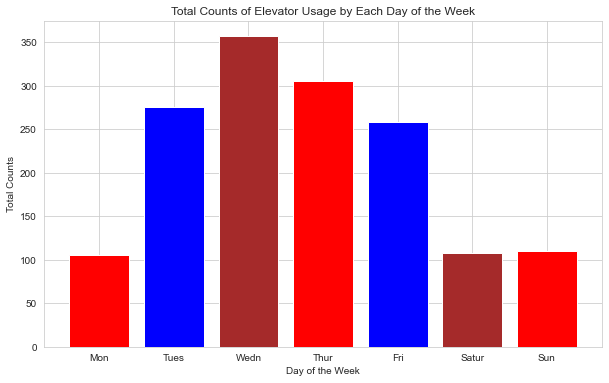

In [20]:
# Calculate the total counts for each day of the week
total_count_mon = elevator_df[elevator_df["Day of the Week"] == "Monday"]["Elevator Type"].count()
total_count_tues = elevator_df[elevator_df["Day of the Week"] == "Tuesday"]["Elevator Type"].count()
total_count_wednes = elevator_df[elevator_df["Day of the Week"] == "Wednesday"]["Elevator Type"].count()
total_count_thurs = elevator_df[elevator_df["Day of the Week"] == "Thursday"]["Elevator Type"].count()
total_count_fri = elevator_df[elevator_df["Day of the Week"] == "Friday"]["Elevator Type"].count()
total_count_satur = elevator_df[elevator_df["Day of the Week"] == "Saturday"]["Elevator Type"].count()
total_count_sun = elevator_df[elevator_df["Day of the Week"] == "Sunday"]["Elevator Type"].count()

# Creating a list of total counts for each day
total_counts = [
    total_count_mon,
    total_count_tues,
    total_count_wednes,
    total_count_thurs,
    total_count_fri,
    total_count_satur,
    total_count_sun]

# List of days of the week
days_of_week = [
    "Mon",
    "Tues",
    "Wedn",
    "Thur",
    "Fri",
    "Satur",
    "Sun"]

plt.figure(figsize=(10, 6))

# Define a list of colors for each bar
colours = ['red', 'blue', 'brown', 'red','blue','brown']

# Plotting the bar chart
bar_color = 'colours'
plt.bar(days_of_week, total_counts, color = colours)
plt.xlabel('Day of the Week')
plt.ylabel('Total Counts')
plt.title('Total Counts of Elevator Usage by Each Day of the Week')

plt.show()

C. ENERGY USAGE OPTIMISATION STRATEGIES DEVELOPMENT

1. Prioritising Energy Efficient Floors

In [21]:
# CALLING FLOOR 0 to DESTINATION FLOOR 2

elevator_eef = pd.DataFrame(elevator[(elevator['Calling Floor'] == 0) & (elevator['Destination Floor'] == 2)])

# column to analyse
cf = 'Calling Floor'
cf_values = elevator_eef[cf]

# Count the occurrences of each value in the chosen column
column_counts = cf_values.value_counts()
highest_values = column_counts.head

print(f"{cf} Counts:")
print(highest_values)

Calling Floor Counts:
<bound method NDFrame.head of 0    114
Name: Calling Floor, dtype: int64>


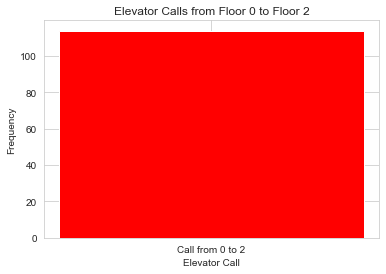

In [22]:
# Filtering the elevator data for Calling Floor == 0 and Destination Floor == 2

elevator_eef = elevator[(elevator['Calling Floor'] == 0) & (elevator['Destination Floor'] == 2)]

# Count the occurrences of this combination
call_counts = elevator_eef.shape[0]

# Create the bar graph
plt.bar(['Call from 0 to 2'], [call_counts], color = 'red')
plt.xlabel('Elevator Call')
plt.ylabel('Frequency')
plt.title('Elevator Calls from Floor 0 to Floor 2')
plt.show()

In [23]:
# CALLING FLOOR 2 to DESTINATION FLOOR 0

elevator_eef = pd.DataFrame(elevator[(elevator['Calling Floor'] == 2) & (elevator['Destination Floor'] == 0)])

# Choose the column to analyse
cf = 'Calling Floor'
cf_values = elevator_eef[cf]

# Count the occurrences of each value in the chosen column
column_counts = cf_values.value_counts()
highest_values = column_counts.head

print(f"{cf} Counts:")
print(highest_values)

Calling Floor Counts:
<bound method NDFrame.head of 2    103
Name: Calling Floor, dtype: int64>


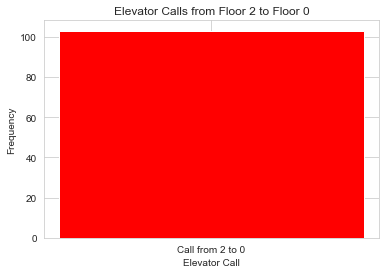

In [24]:
# Filtering the data for Calling Floor == 2 and Destination Floor == 0

elevator_eef = elevator[(elevator['Calling Floor'] == 2) & (elevator['Destination Floor'] == 0)]

# Count the occurrences of this combination
call_counts = elevator_eef.shape[0]

# Create the bar graph
plt.bar(['Call from 2 to 0'], [call_counts], color = 'red')
plt.xlabel('Elevator Call')
plt.ylabel('Frequency')
plt.title('Elevator Calls from Floor 2 to Floor 0')
plt.show()

2. Optimised Peak Hours Smart Scheduling

    - Peak Hour Usage

In [25]:
# Converting string columns to datetime objects
time_columns = ['Calling Time', 'Calling Arrive Time', 'Destination Arrive Time']
for column in time_columns:
    elevator[column] = pd.to_datetime(elevator[column], format='%H:%M:%S').dt.time

# Calculating the Journey Time
elevator['Journey Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Destination Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']), axis=1)

elevator_df = pd.DataFrame(elevator)

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\1618154700.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  elevator['Journey Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Destination Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']), axis=1)


In [26]:
monday_ss = elevator_df[(elevator_df['Calling Time'] >= pd.to_datetime('09:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Calling Time'] <= pd.to_datetime('13:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Calling Floor'] == 0) &
                        (elevator_df['Destination Floor'] == 2) &
                        (elevator_df['Day of the Week'] == 'Monday')]
monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
monday_ss

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\2090595707.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\2090595707.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)


,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Wait Time
632,2,0,11:01:49,0,11:01:49,2,11:02:14,Monday,27/05/2019,0 days 00:00:25,0 days 00:00:00
633,2,0,11:52:57,0,11:52:57,2,11:53:23,Monday,27/05/2019,0 days 00:00:26,0 days 00:00:00
1044,3,0,12:00:13,0,12:00:13,2,12:00:38,Monday,27/05/2019,0 days 00:00:25,0 days 00:00:00
1046,3,0,12:13:43,0,12:13:43,2,12:14:08,Monday,27/05/2019,0 days 00:00:25,0 days 00:00:00
1047,3,0,12:44:04,2,12:44:12,2,12:44:37,Monday,27/05/2019,0 days 00:00:25,0 days 00:00:08


In [27]:
monday_ss = elevator_df[(elevator_df['Calling Time'] >= pd.to_datetime('09:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'] <= pd.to_datetime('13:00:00', format='%H:%M:%S').time()) &
                            (elevator_df ['Calling Floor'] == 0) &
                            (elevator_df ['Destination Floor'] == 7) &
                            (elevator_df['Day of the Week'] == 'Monday')]
monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
monday_ss

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\3862299825.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\3862299825.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)


,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Wait Time
232,1,0,09:08:35,2,09:08:43,7,09:09:29,Monday,27/05/2019,0 days 00:00:46,0 days 00:00:08
236,1,0,09:51:51,13,09:52:43,7,09:53:28,Monday,27/05/2019,0 days 00:00:45,0 days 00:00:52
239,1,0,10:51:51,0,10:51:51,7,10:52:36,Monday,27/05/2019,0 days 00:00:45,0 days 00:00:00
638,2,0,12:37:33,0,12:37:33,7,12:38:18,Monday,27/05/2019,0 days 00:00:45,0 days 00:00:00
1412,4,0,12:33:16,0,12:33:16,7,12:34:02,Monday,27/05/2019,0 days 00:00:46,0 days 00:00:00


In [28]:
monday_ss = elevator_df[(elevator_df['Calling Time'] >= pd.to_datetime('09:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'] <= pd.to_datetime('13:00:00', format='%H:%M:%S').time()) &
                            (elevator_df ['Calling Floor'] == 0) &
                            (elevator_df ['Destination Floor'] == 16) &
                            (elevator_df['Day of the Week'] == 'Monday')]
monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
monday_ss

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\2472316495.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\2472316495.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)


,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Wait Time
626,2,0,09:38:23,11,09:39:27,16,09:40:48,Monday,27/05/2019,0 days 00:01:21,0 days 00:01:04
634,2,0,11:56:01,0,11:56:01,16,11:57:22,Monday,27/05/2019,0 days 00:01:21,0 days 00:00:00
636,2,0,12:12:15,0,12:12:15,16,12:13:36,Monday,27/05/2019,0 days 00:01:21,0 days 00:00:00
1036,3,0,09:03:33,2,09:03:41,16,09:05:02,Monday,27/05/2019,0 days 00:01:21,0 days 00:00:08


In [29]:
monday_ss = elevator_df[(elevator_df['Calling Time'] >= pd.to_datetime('09:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'] <= pd.to_datetime('13:00:00', format='%H:%M:%S').time()) &
                            (elevator_df ['Calling Floor'] == 0) &
                            (elevator_df ['Destination Floor'] == 19) &
                            (elevator_df['Day of the Week'] == 'Monday')]
monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
monday_ss

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\119180678.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)
C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\119180678.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  monday_ss['Wait Time'] = elevator.apply(lambda row: pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Arrive Time']) - pd.Timestamp.combine(pd.datetime.now().date(), row['Calling Time']), axis=1)


,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Wait Time
242,1,0,11:34:15,0,11:34:15,19,11:35:48,Monday,27/05/2019,0 days 00:01:33,0 days 00:00:00
1040,3,0,09:36:23,0,09:36:23,19,09:37:56,Monday,27/05/2019,0 days 00:01:33,0 days 00:00:00
1043,3,0,11:42:53,0,11:42:53,19,11:44:26,Monday,27/05/2019,0 days 00:01:33,0 days 00:00:00
1408,4,0,09:20:37,16,09:21:41,19,09:23:15,Monday,27/05/2019,0 days 00:01:34,0 days 00:01:04
1410,4,0,11:21:25,0,11:21:25,19,11:22:58,Monday,27/05/2019,0 days 00:01:33,0 days 00:00:00


- Smart Scheduling for Peak Hours.

In [30]:
# Renaming the columns.

new_column_names = {
    "Elevator Type": "Elev Type",
    "Calling Floor": "Calln Floor",
    "Calling Time": "Calling Time",
    "Resting Floor": "Restn Floor",
    "Calling Arrive Time": "Call Arr Time",
    "Destination Floor": "Destn Floor",
    "Destination Arrive Time": "Destn Arr Time",
    "Day of the Week": "Day",
    "Date": "Date"}

elevator_df.rename(columns=new_column_names, inplace=True)

C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\1152692624.py:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phm_monday['Wait Time'] = (phm_monday['Call Arr Time'] - phm_monday['Calling Time']).dt.total_seconds() / 60
C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\1152692624.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  phm_tuesday['Wait Time'] = (phm_tuesday['Call Arr Time'] - phm_tuesday['Calling Time']).dt.total_seconds() / 60
C:\Users\Seyio\AppData\Local\Temp\ipykernel_22108\1152692624.py

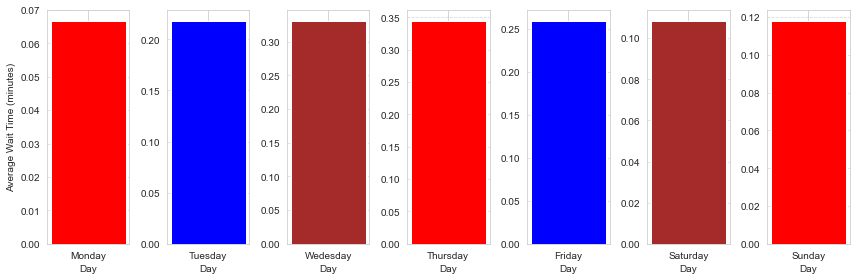

In [31]:
elevator_df = pd.DataFrame(elevator)

# Convert time columns to datetime objects
elevator_df['Call Arr Time'] = pd.to_datetime(elevator_df['Call Arr Time'], format='%H:%M:%S')
elevator_df['Calling Time'] = pd.to_datetime(elevator_df['Calling Time'], format='%H:%M:%S')

# Filter data for Saturday and Sunday within specific time ranges
phm_monday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('08:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'].dt.time <= pd.to_datetime('09:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Day'] == 'Monday')]

phm_tuesday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('11:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'].dt.time <= pd.to_datetime('12:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Day'] == 'Tuesday')]

phm_wednesday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('11:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'].dt.time <= pd.to_datetime('12:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Day'] == 'Wednesday')]

phm_thursday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('11:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Calling Time'].dt.time <= pd.to_datetime('12:00:00', format='%H:%M:%S').time()) &
                          (elevator_df['Day'] == 'Thursday')]

phm_friday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('16:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Calling Time'].dt.time <= pd.to_datetime('17:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Day'] == 'Friday')]

phm_saturday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('11:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Calling Time'].dt.time <= pd.to_datetime('12:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Day'] == 'Saturday')]

phm_sunday = elevator_df[(elevator_df['Calling Time'].dt.time >= pd.to_datetime('12:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Calling Time'].dt.time <= pd.to_datetime('13:00:00', format='%H:%M:%S').time()) &
                        (elevator_df['Day'] == 'Sunday')]

# Calculate wait time as a timedelta
phm_monday['Wait Time'] = (phm_monday['Call Arr Time'] - phm_monday['Calling Time']).dt.total_seconds() / 60
phm_tuesday['Wait Time'] = (phm_tuesday['Call Arr Time'] - phm_tuesday['Calling Time']).dt.total_seconds() / 60
phm_wednesday['Wait Time'] = (phm_wednesday['Call Arr Time'] - phm_wednesday['Calling Time']).dt.total_seconds() / 60
phm_thursday['Wait Time'] = (phm_thursday['Call Arr Time'] - phm_thursday['Calling Time']).dt.total_seconds() / 60
phm_friday['Wait Time'] = (phm_friday['Call Arr Time'] - phm_friday['Calling Time']).dt.total_seconds() / 60
phm_saturday['Wait Time'] = (phm_saturday['Call Arr Time'] - phm_saturday['Calling Time']).dt.total_seconds() / 60
phm_sunday['Wait Time'] = (phm_sunday['Call Arr Time'] - phm_sunday['Calling Time']).dt.total_seconds() / 60

# Group the data by 'Day' and calculate the average wait time for each day
average_wait_time_monday = phm_monday['Wait Time'].mean()
average_wait_time_tuesday = phm_tuesday['Wait Time'].mean()
average_wait_time_wednesday = phm_wednesday['Wait Time'].mean()
average_wait_time_thursday = phm_thursday['Wait Time'].mean()
average_wait_time_friday = phm_friday['Wait Time'].mean()
average_wait_time_saturday = phm_saturday['Wait Time'].mean()
average_wait_time_sunday = phm_sunday['Wait Time'].mean()

# Create subplots for both mon to Sunday
fig, axs = plt.subplots(1, 7, figsize=(12, 4))

# Plot average wait time for monday
axs[0].bar(['Monday'], [average_wait_time_monday], color='red')
axs[0].set_xlabel('Day')
axs[0].set_ylabel('Average Wait Time (minutes)')
axs[0].grid(axis='y', linestyle='--', alpha=0.7)

axs[1].bar(['Tuesday'], [average_wait_time_tuesday], color='blue')
axs[1].set_xlabel('Day')
axs[1].grid(axis='y', linestyle='--', alpha=0.7)

axs[2].bar(['Wedesday'], [average_wait_time_wednesday], color='brown')
axs[2].set_xlabel('Day')
axs[2].grid(axis='y', linestyle='--', alpha=0.7)

axs[3].bar(['Thursday'], [average_wait_time_thursday], color='red')
axs[3].set_xlabel('Day')
axs[3].grid(axis='y', linestyle='--', alpha=0.7)

axs[4].bar(['Friday'], [average_wait_time_friday], color='blue')
axs[4].set_xlabel('Day')
axs[4].grid(axis='y', linestyle='--', alpha=0.7)

axs[5].bar(['Saturday'], [average_wait_time_saturday], color='brown')
axs[5].set_xlabel('Day')
axs[5].grid(axis='y', linestyle='--', alpha=0.7)

axs[6].bar(['Sunday'], [average_wait_time_sunday], color='red')
axs[6].set_xlabel('Day')
axs[6].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


3. Model Development.
- Linear Regression Analysis (Machine Learning) Approach To Predict Each Elevator Overall Journey time

In [32]:
# Data for elevator
elevator_1 = pd.read_csv("ELEVATOR_1.csv")
elevator_2 = pd.read_csv("ELEVATOR_2.csv")
elevator_3 = pd.read_csv("ELEVATOR_3.csv")
elevator_4 = pd.read_csv("ELEVATOR_4.csv")

# Concatenate the data into a single dataframe and remove space in columns names
elevator_1.columns = elevator_1.columns.str.strip()
elevator_2.columns = elevator_2.columns.str.strip()
elevator_3.columns = elevator_3.columns.str.strip()
elevator_4.columns = elevator_4.columns.str.strip()

# Create a list of elevator dataframes
elevators = [elevator_1, elevator_2, elevator_3, elevator_4]

# Create an empty dictionary to store model results for each elevator
results = {}

# Loop through each elevator data
for i, elevator_data in enumerate(elevators):
    elevator_type = f"Elevator_{i+1}"
    
    # Convert time-related columns to datetime format
    elevator_data['Destination Arrive Time'] = pd.to_datetime(elevator_data['Destination Arrive Time'])
    elevator_data['Calling Arrive Time'] = pd.to_datetime(elevator_data['Calling Arrive Time'])
    elevator_data['Calling Time'] = pd.to_datetime(elevator_data['Calling Time'])

    # Calculate journey time in seconds and adding it as a new column
    elevator_data['Journey Time'] = (elevator_data['Destination Arrive Time'] - elevator_data['Calling Arrive Time']).dt.total_seconds()

    # Extracting hour and minute from 'Calling Time' column
    elevator_data['Calling Hour'] = elevator_data['Calling Time'].dt.hour
    elevator_data['Calling Minute'] = elevator_data['Calling Time'].dt.minute

    # Removing unnecessary datapoints from 'Calling Time', 'Destination Arrive Time', and 'Calling Arrive Time' columns
    elevator_data['Calling Time'] = elevator_data['Calling Time'].dt.strftime('%H:%M:%S')
    elevator_data['Destination Arrive Time'] = elevator_data['Destination Arrive Time'].dt.strftime('%H:%M:%S')
    elevator_data['Calling Arrive Time'] = elevator_data['Calling Arrive Time'].dt.strftime('%H:%M:%S')

    # Split the data into features (X) and target (y)
    X = elevator_data[['Calling Floor', 'Calling Hour', 'Calling Minute', 'Resting Floor']]
    y = elevator_data['Journey Time']  # Target variable (journey time)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    
    # Store results in the dictionary
    results[elevator_type] = {
        'Model': model,
        'RMSE': rmse}

# Print results for each elevator
for elevator_name, result in results.items():
    print(f"{elevator_name}: Root Mean Squared Error = {result['RMSE']}")

Elevator_1: Root Mean Squared Error = 19.406754072388864
Elevator_2: Root Mean Squared Error = 20.557542998726802
Elevator_3: Root Mean Squared Error = 18.32347956953585
Elevator_4: Root Mean Squared Error = 15.705334185183146


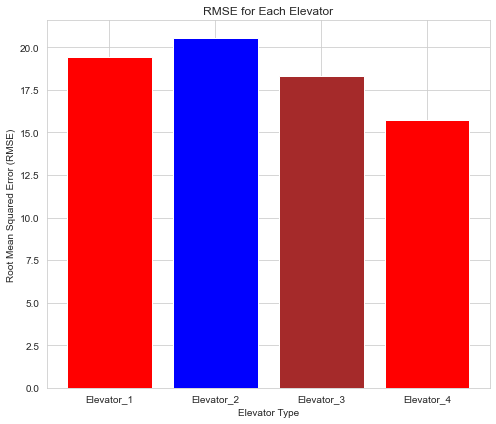

In [33]:
# Creating a bar chart to visualize RMSE for each elevator

elevator_names = [elevator_name for elevator_name in results.keys()]
rmse_values = [result['RMSE'] for result in results.values()]

# Define a list of colours for each bar
colours = ['red', 'blue', 'brown','red']

plt.figure(figsize=(7, 6))
plt.bar(elevator_names, rmse_values, color=colours)
plt.title('RMSE for Each Elevator')
plt.xlabel('Elevator Type')
plt.ylabel('Root Mean Squared Error (RMSE)')
plt.xticks(rotation=0)
plt.tight_layout()

plt.show()

Model Evaluation.
- Explanation of the datasets, the training and testing sets, the RMSE output.

ELEVATOR_1

In [34]:
# Data for each elevator
elevator_1 = pd.read_csv("ELEVATOR_1.csv")

# Concatenate the data into a single dataframe and remove space in columns names
elevator_1.columns = elevator_1.columns.str.strip()

# Create elevator dataframes
elevators = [elevator_1]

# Create an empty dictionary to store model result for elevator
results = {}

# Loop through elevator data
for i, elevator_data in enumerate(elevators):
    elevator_type = f"Elevator_{i+1}"
    
    # Convert time-related columns to datetime format
    elevator_data['Destination Arrive Time'] = pd.to_datetime(elevator_data['Destination Arrive Time'])
    elevator_data['Calling Arrive Time'] = pd.to_datetime(elevator_data['Calling Arrive Time'])
    elevator_data['Calling Time'] = pd.to_datetime(elevator_data['Calling Time'])

    # Calculate journey time in seconds and adding it as a new column
    elevator_data['Journey Time'] = (elevator_data['Destination Arrive Time'] - elevator_data['Calling Arrive Time']).dt.total_seconds()

    # Extracting hour and minute from 'Calling Time' column
    elevator_data['Calling Hour'] = elevator_data['Calling Time'].dt.hour
    elevator_data['Calling Minute'] = elevator_data['Calling Time'].dt.minute

    # Remove year, month, and date portion from 'Calling Time', 'Destination Arrive Time', and 'Calling Arrive Time' columns
    elevator_data['Calling Time'] = elevator_data['Calling Time'].dt.strftime('%H:%M:%S')
    elevator_data['Destination Arrive Time'] = elevator_data['Destination Arrive Time'].dt.strftime('%H:%M:%S')
    elevator_data['Calling Arrive Time'] = elevator_data['Calling Arrive Time'].dt.strftime('%H:%M:%S')

    # Split the data into features (X) and target (y)
    X = elevator_data[['Calling Floor', 'Calling Hour', 'Calling Minute', 'Resting Floor']]
    y = elevator_data['Journey Time']  # Target variable (journey time)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

In [35]:
elevator_data

,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Calling Hour,Calling Minute
0,1,0,06:39:18,0,06:39:18,12,06:40:23,Wednesday,22/05/2019,65.0,6,39
1,1,0,07:12:18,12,07:13:06,16,07:14:27,Wednesday,22/05/2019,81.0,7,12
2,1,0,07:43:32,11,07:44:16,9,07:45:15,Wednesday,22/05/2019,59.0,7,43
3,1,0,07:49:30,18,07:50:42,12,07:51:47,Wednesday,22/05/2019,65.0,7,49
4,1,0,07:55:32,12,07:56:20,7,07:57:05,Wednesday,22/05/2019,45.0,7,55
...,...,...,...,...,...,...,...,...,...,...,...,...
312,1,0,19:10:57,0,19:10:57,2,19:11:22,Tuesday,28/05/2019,25.0,19,10
313,1,13,19:11:37,2,19:12:21,0,19:13:30,Tuesday,28/05/2019,69.0,19,11
314,1,0,19:18:40,0,19:18:40,2,19:19:05,Tuesday,28/05/2019,25.0,19,18
315,1,13,19:24:25,2,19:25:09,0,19:26:18,Tuesday,28/05/2019,69.0,19,24


In [36]:
# Training set (80% of dataset)

print ("Calling Floor, Calling Time, Resting Floor") # Independent variable
X_train

Calling Floor, Calling Time, Resting Floor


,Calling Floor,Calling Hour,Calling Minute,Resting Floor
209,0,9,25,9
76,0,7,50,2
94,0,11,48,0
221,0,14,48,0
309,15,18,57,0
...,...,...,...,...
188,0,9,31,5
71,0,7,0,7
106,0,13,13,0
270,15,11,25,16


In [37]:
# Training set (80% of dataset)

print ("Journey time") # Dependent variable
y_train

Journey time


209    61.0
76     41.0
94     57.0
221    37.0
309    77.0
       ... 
188    49.0
71     65.0
106    65.0
270    77.0
102    81.0
Name: Journey Time, Length: 253, dtype: float64

In [38]:
# Testing set (20% of datasets)

X_test

,Calling Floor,Calling Hour,Calling Minute,Resting Floor
73,0,7,39,2
280,9,12,37,0
25,0,10,17,0
255,10,19,2,10
9,0,8,24,2
...,...,...,...,...
219,0,13,52,0
208,0,9,16,5
109,0,13,22,10
93,19,11,37,0


In [39]:
# Actual Journey Time

y_test

73     25.0
280    53.0
25     69.0
255    57.0
9      81.0
       ... 
219    58.0
208    54.0
109    60.0
93     93.0
124    81.0
Name: Journey Time, Length: 64, dtype: float64

In [40]:
# Predicted Journey time for the testing set.

y_pred

array([51.34077818, 61.11078937, 48.61796728, 58.34741993, 51.18730883,
       43.89026669, 66.57246179, 51.17670297, 38.30755622, 46.16846808,
       79.33005107, 52.84673876, 45.18085405, 40.46317717, 69.5277662 ,
       49.36957852, 53.6598922 , 40.06857535, 36.94842454, 72.75972656,
       54.95086524, 63.89994966, 45.10321465, 44.54057222, 68.57938898,
       43.34219552, 38.69487242, 57.322599  , 42.39404635, 61.7242737 ,
       66.36914978, 50.76752991, 42.9224166 , 78.86522909, 40.22933033,
       51.04293454, 38.45373996, 59.24205212, 39.47295108, 66.47377572,
       52.87523609, 52.53980005, 47.40234426, 68.52802794, 63.36784207,
       53.84676809, 44.58412851, 82.76484331, 43.63800925, 53.66963243,
       39.66668791, 51.11421696, 69.89083395, 44.83638595, 49.34591221,
       33.49219253, 48.03353101, 58.91554612, 71.61029529, 41.72736012,
       51.09177795, 46.20728778, 81.15729354, 73.01059926])

In [41]:
# Calculation of Residuals

y_test - y_pred

73    -26.340778
280    -8.110789
25     20.382033
255    -1.347420
9      29.812691
         ...    
219    16.272640
208     2.908222
109    13.792712
93     11.842706
124     7.989401
Name: Journey Time, Length: 64, dtype: float64

In [42]:
# RMSE Calculation

mse = mean_squared_error(y_test, y_pred)

mse

376.6221036261818

In [43]:
Rmse = mse ** 0.5

Rmse

19.406754072388864

ELEVATOR_2

In [44]:
# Data for each elevator
elevator_2 = pd.read_csv("ELEVATOR_2.csv")

# Concatenate the data into a single dataframe and remove space in columns names
elevator_2.columns = elevator_2.columns.str.strip()

# Create elevator dataframes
elevators = [elevator_2]

# Create an empty dictionary to store model result for elevator
results = {}

# Loop through elevator data
for i, elevator_data in enumerate(elevators):
    elevator_type = f"Elevator_{i+1}"
    
    # Convert time-related columns to datetime format
    elevator_data['Destination Arrive Time'] = pd.to_datetime(elevator_data['Destination Arrive Time'])
    elevator_data['Calling Arrive Time'] = pd.to_datetime(elevator_data['Calling Arrive Time'])
    elevator_data['Calling Time'] = pd.to_datetime(elevator_data['Calling Time'])

    # Calculate journey time in seconds and adding it as a new column
    elevator_data['Journey Time'] = (elevator_data['Destination Arrive Time'] - elevator_data['Calling Arrive Time']).dt.total_seconds()

    # Extracting hour and minute from 'Calling Time' column
    elevator_data['Calling Hour'] = elevator_data['Calling Time'].dt.hour
    elevator_data['Calling Minute'] = elevator_data['Calling Time'].dt.minute

    # Remove year, month, and date portion from 'Calling Time', 'Destination Arrive Time', and 'Calling Arrive Time' columns
    elevator_data['Calling Time'] = elevator_data['Calling Time'].dt.strftime('%H:%M:%S')
    elevator_data['Destination Arrive Time'] = elevator_data['Destination Arrive Time'].dt.strftime('%H:%M:%S')
    elevator_data['Calling Arrive Time'] = elevator_data['Calling Arrive Time'].dt.strftime('%H:%M:%S')

    # Split the data into features (X) and target (y)
    X = elevator_data[['Calling Floor', 'Calling Hour', 'Calling Minute', 'Resting Floor']]
    y = elevator_data['Journey Time']  # Target variable (journey time)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

In [45]:
elevator_data

,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Calling Hour,Calling Minute
0,2,0,06:35:51,0,06:35:51,12,06:36:57,Wednesday,22/05/2019,66.0,6,35
1,2,0,07:15:44,12,07:16:32,9,07:17:25,Wednesday,22/05/2019,53.0,7,15
2,2,0,07:28:56,9,07:29:32,7,07:30:17,Wednesday,22/05/2019,45.0,7,28
3,2,0,07:36:07,16,07:36:35,19,07:38:08,Wednesday,22/05/2019,93.0,7,36
4,2,0,08:09:36,13,08:10:52,12,08:11:57,Wednesday,22/05/2019,65.0,8,9
...,...,...,...,...,...,...,...,...,...,...,...,...
403,2,2,18:51:24,0,18:51:32,0,18:51:57,Tuesday,28/05/2019,25.0,18,51
404,2,14,19:03:04,0,19:04:00,0,19:05:13,Tuesday,28/05/2019,73.0,19,3
405,2,4,19:08:26,0,19:08:42,0,19:09:16,Tuesday,28/05/2019,34.0,19,8
406,2,0,19:39:52,0,19:39:52,2,19:40:17,Tuesday,28/05/2019,25.0,19,39


In [46]:
# Training set (80% of dataset)

print ("Calling Floor, Calling Time, Resting Floor") # Independent variable
X_train

Calling Floor, Calling Time, Resting Floor


,Calling Floor,Calling Hour,Calling Minute,Resting Floor
331,13,19,19,0
3,0,7,36,16
18,0,10,20,7
131,18,11,13,16
118,0,9,42,0
...,...,...,...,...
71,0,15,35,0
106,0,7,57,7
270,2,14,16,6
348,0,10,5,15


In [47]:
# Training set (80% of dataset)

print ("Journey time") # Dependent variable
y_train

Journey time


331    69.0
3      93.0
18     61.0
131    89.0
118    44.0
       ... 
71     65.0
106    66.0
270    25.0
348    33.0
102    65.0
Name: Journey Time, Length: 326, dtype: float64

In [48]:
# Testing set (20% of datasets)

X_test

,Calling Floor,Calling Hour,Calling Minute,Resting Floor
70,5,14,50,0
218,19,16,32,19
258,2,10,43,0
33,0,11,39,0
42,16,12,11,0
...,...,...,...,...
90,12,18,18,0
379,0,14,34,0
341,0,9,29,2
376,2,14,22,2


In [49]:
# Actual Journey Time

y_test

70     37.0
218    99.0
258    25.0
33     37.0
42     81.0
       ... 
90     65.0
379    53.0
341    60.0
376    25.0
357    25.0
Name: Journey Time, Length: 82, dtype: float64

In [50]:
# Predicted Journey time for the testing set.

y_pred

array([54.09249041, 78.39616157, 53.411484  , 48.73803444, 76.52954417,
       43.21762679, 74.82878768, 54.60665527, 39.51289756, 60.24257777,
       47.02320133, 72.78831025, 51.14614251, 52.8290547 , 47.58251924,
       76.93608548, 73.08220117, 63.28043927, 52.28027734, 46.83596003,
       66.01554464, 44.12463569, 51.62914686, 70.05764753, 58.95641506,
       52.95000082, 73.97866953, 44.19334856, 54.59168377, 50.24447444,
       69.38785666, 64.01781626, 54.52997235, 50.1210516 , 54.5795647 ,
       58.62821728, 47.37970186, 49.20704124, 59.80487261, 42.93216938,
       48.97787868, 46.91001373, 51.61537252, 52.319863  , 63.41145947,
       50.02231332, 73.81076862, 46.54696987, 54.21471276, 50.03465561,
       54.62705001, 49.89889048, 51.24488078, 71.15062685, 41.10573354,
       45.47762744, 44.13163714, 73.62104224, 83.91656923, 50.48431867,
       47.56581006, 58.40951317, 48.99722241, 78.49482945, 52.14654886,
       69.94265819, 65.01438122, 53.64064656, 65.98634369, 53.98

In [51]:
# Calculation of Residuals

y_test - y_pred

70    -17.092490
218    20.603838
258   -28.411484
33    -11.738034
42      4.470456
         ...    
90      2.596544
379     7.645795
341     8.698525
376   -24.219607
357   -23.589927
Name: Journey Time, Length: 82, dtype: float64

In [52]:
# RMSE Calculation

mse = mean_squared_error(y_test, y_pred)

mse

422.6125741445013

In [53]:
Rmse = mse ** 0.5

Rmse

20.557542998726802

ELEVATOR_3

In [54]:
# Data for each elevator
elevator_3 = pd.read_csv("ELEVATOR_3.csv")

# Concatenate the data into a single dataframe and remove space in columns names
elevator_3.columns = elevator_3.columns.str.strip()

# Create elevator dataframes
elevators = [elevator_3]

# Create an empty dictionary to store model result for elevator
results = {}

# Loop through elevator data
for i, elevator_data in enumerate(elevators):
    elevator_type = f"Elevator_{i+1}"
    
    # Convert time-related columns to datetime format
    elevator_data['Destination Arrive Time'] = pd.to_datetime(elevator_data['Destination Arrive Time'])
    elevator_data['Calling Arrive Time'] = pd.to_datetime(elevator_data['Calling Arrive Time'])
    elevator_data['Calling Time'] = pd.to_datetime(elevator_data['Calling Time'])

    # Calculate journey time in seconds and adding it as a new column
    elevator_data['Journey Time'] = (elevator_data['Destination Arrive Time'] - elevator_data['Calling Arrive Time']).dt.total_seconds()

    # Extracting hour and minute from 'Calling Time' column
    elevator_data['Calling Hour'] = elevator_data['Calling Time'].dt.hour
    elevator_data['Calling Minute'] = elevator_data['Calling Time'].dt.minute

    # Remove year, month, and date portion from 'Calling Time', 'Destination Arrive Time', and 'Calling Arrive Time' columns
    elevator_data['Calling Time'] = elevator_data['Calling Time'].dt.strftime('%H:%M:%S')
    elevator_data['Destination Arrive Time'] = elevator_data['Destination Arrive Time'].dt.strftime('%H:%M:%S')
    elevator_data['Calling Arrive Time'] = elevator_data['Calling Arrive Time'].dt.strftime('%H:%M:%S')

    # Split the data into features (X) and target (y)
    X = elevator_data[['Calling Floor', 'Calling Hour', 'Calling Minute', 'Resting Floor']]
    y = elevator_data['Journey Time']  # Target variable (journey time)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

In [55]:
elevator_data

,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Calling Hour,Calling Minute
0,3,0,06:38:29,0,06:38:29,12,06:39:35,Wednesday,22/05/2019,66.0,6,38
1,3,0,07:36:49,12,07:37:37,16,07:38:59,Wednesday,22/05/2019,82.0,7,36
2,3,0,07:46:08,16,07:47:12,19,07:48:45,Wednesday,22/05/2019,93.0,7,46
3,3,0,08:53:55,11,08:54:39,19,08:56:13,Wednesday,22/05/2019,94.0,8,53
4,3,19,09:12:00,19,09:12:00,0,09:13:33,Wednesday,22/05/2019,93.0,9,12
...,...,...,...,...,...,...,...,...,...,...,...,...
381,3,15,18:17:23,0,18:18:23,0,18:19:40,Tuesday,28/05/2019,77.0,18,17
382,3,0,18:38:27,0,18:38:27,2,18:38:52,Tuesday,28/05/2019,25.0,18,38
383,3,2,18:42:56,2,18:42:56,0,18:43:21,Tuesday,28/05/2019,25.0,18,42
384,3,13,18:54:33,0,18:55:25,0,18:56:34,Tuesday,28/05/2019,69.0,18,54


In [56]:
# Training set (80% of dataset)

print ("Calling Floor, Calling Time, Resting Floor") # Independent variable
X_train

Calling Floor, Calling Time, Resting Floor


,Calling Floor,Calling Hour,Calling Minute,Resting Floor
255,4,19,7,2
374,19,17,14,13
363,2,14,45,10
82,5,17,45,0
222,2,14,6,2
...,...,...,...,...
71,11,16,34,19
106,0,8,15,12
270,11,13,32,11
348,13,10,27,13


In [57]:
# Training set (80% of dataset)

print ("Journey time") # Dependent variable
y_train

Journey time


255    34.0
374    96.0
363    25.0
82     38.0
222    25.0
       ... 
71     61.0
106    77.0
270    61.0
348    69.0
102    65.0
Name: Journey Time, Length: 308, dtype: float64

In [58]:
# Testing set (20% of datasets)

X_test

,Calling Floor,Calling Hour,Calling Minute,Resting Floor
336,0,18,30,0
307,9,19,26,10
90,15,18,25,0
265,0,9,17,0
150,16,13,59,16
...,...,...,...,...
18,0,10,18,6
137,4,12,23,0
357,0,13,3,4
168,11,17,28,3


In [59]:
# Actual Journey Time

y_test

336    25.0
307    53.0
90     80.0
265    37.0
150    81.0
       ... 
18     65.0
137    33.0
357    65.0
168    61.0
63     61.0
Name: Journey Time, Length: 78, dtype: float64

In [60]:
# Predicted Journey time for the testing set.

y_pred

array([41.48199162, 57.93653263, 66.57253594, 51.63404282, 73.72860739,
       46.34105974, 63.19585066, 52.37757817, 51.58380304, 46.04081508,
       71.36010066, 61.69563098, 48.49192526, 47.44909383, 48.41412115,
       50.29612888, 59.05684462, 41.62272124, 70.95193715, 70.07947579,
       45.93903517, 70.36719649, 48.32395485, 50.33861684, 55.00793739,
       51.06826142, 73.06976265, 72.63442583, 51.63404282, 52.67687425,
       52.32789594, 63.93517244, 84.52477444, 47.22016256, 54.22261763,
       43.95515222, 51.03908422, 51.65609323, 50.66091191, 52.43889081,
       48.37324605, 45.97045027, 51.40058547, 47.47114424, 52.21058457,
       52.65061027, 50.56916098, 45.34559412, 75.69011639, 72.51758773,
       71.54701826, 48.50653637, 57.69456385, 63.87848121, 66.68931799,
       46.42764852, 55.17119171, 47.33462819, 71.23051139, 51.31132849,
       47.49319465, 40.74266984, 48.31816768, 60.39897213, 51.72645804,
       72.15159966, 51.10128938, 44.55795795, 64.07732493, 65.40

In [61]:
# Calculation of Residuals

y_test - y_pred

336   -16.481992
307    -4.936533
90     13.427464
265   -14.634043
150     7.271393
         ...    
18     13.071500
137   -21.663592
357    15.129286
168    -0.412911
63     16.186847
Name: Journey Time, Length: 78, dtype: float64

In [62]:
mse

335.74990353519763

In [63]:
Rmse = mse ** 0.5

Rmse

18.32347956953585

ELEVATOR_4

In [64]:
# Data for each elevator
elevator_4 = pd.read_csv("ELEVATOR_4.csv")

# Concatenate the data into a single dataframe and remove space in columns names
elevator_4.columns = elevator_4.columns.str.strip()

# Create elevator dataframes
elevators = [elevator_4]

# Create an empty dictionary to store model result for elevator
results = {}

# Loop through elevator data
for i, elevator_data in enumerate(elevators):
    elevator_type = f"Elevator_{i+1}"
    
    # Convert time-related columns to datetime format
    elevator_data['Destination Arrive Time'] = pd.to_datetime(elevator_data['Destination Arrive Time'])
    elevator_data['Calling Arrive Time'] = pd.to_datetime(elevator_data['Calling Arrive Time'])
    elevator_data['Calling Time'] = pd.to_datetime(elevator_data['Calling Time'])

    # Calculate journey time in seconds and adding it as a new column
    elevator_data['Journey Time'] = (elevator_data['Destination Arrive Time'] - elevator_data['Calling Arrive Time']).dt.total_seconds()

    # Extracting hour and minute from 'Calling Time' column
    elevator_data['Calling Hour'] = elevator_data['Calling Time'].dt.hour
    elevator_data['Calling Minute'] = elevator_data['Calling Time'].dt.minute

    # Remove year, month, and date portion from 'Calling Time', 'Destination Arrive Time', and 'Calling Arrive Time' columns
    elevator_data['Calling Time'] = elevator_data['Calling Time'].dt.strftime('%H:%M:%S')
    elevator_data['Destination Arrive Time'] = elevator_data['Destination Arrive Time'].dt.strftime('%H:%M:%S')
    elevator_data['Calling Arrive Time'] = elevator_data['Calling Arrive Time'].dt.strftime('%H:%M:%S')

    # Split the data into features (X) and target (y)
    X = elevator_data[['Calling Floor', 'Calling Hour', 'Calling Minute', 'Resting Floor']]
    y = elevator_data['Journey Time']  # Target variable (journey time)

    # Split data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Initialize and train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate model
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5

In [65]:
elevator_data

,Elevator Type,Calling Floor,Calling Time,Resting Floor,Calling Arrive Time,Destination Floor,Destination Arrive Time,Day of the Week,Date,Journey Time,Calling Hour,Calling Minute
0,4,0,06:56:21,0,06:56:21,9,06:57:14,Wednesday,22/05/2019,53.0,6,56
1,4,0,07:00:08,9,07:00:44,11,07:01:45,Wednesday,22/05/2019,61.0,7,0
2,4,0,07:05:40,11,07:06:24,19,07:07:57,Wednesday,22/05/2019,93.0,7,5
3,4,0,07:52:09,13,07:52:50,2,07:53:18,Wednesday,22/05/2019,28.0,7,52
4,4,0,08:07:46,13,08:08:37,2,08:09:05,Wednesday,22/05/2019,28.0,8,7
...,...,...,...,...,...,...,...,...,...,...,...,...
404,4,6,18:53:36,0,18:54:00,0,18:54:41,Tuesday,28/05/2019,41.0,18,53
405,4,15,19:00:07,0,19:01:07,0,19:02:24,Tuesday,28/05/2019,77.0,19,0
406,4,11,19:09:02,0,19:09:46,0,19:10:47,Tuesday,28/05/2019,61.0,19,9
407,4,0,19:40:58,0,19:40:58,10,19:41:55,Tuesday,28/05/2019,57.0,19,40


In [66]:
# Training set (80% of dataset)

print ("Calling Floor, Calling Time, Resting Floor") # Independent variable
X_train

Calling Floor, Calling Time, Resting Floor


,Calling Floor,Calling Hour,Calling Minute,Resting Floor
108,15,12,7,2
377,5,14,3,6
247,0,13,55,2
175,0,9,52,4
3,0,7,52,13
...,...,...,...,...
71,6,17,3,0
106,12,12,4,0
270,0,11,41,0
348,0,12,10,0


In [67]:
# Training set (80% of dataset)

print ("Journey time") # Dependent variable
y_train

Journey time


108    78.0
377    37.0
247    61.0
175    36.0
3      28.0
       ... 
71     41.0
106    65.0
270    25.0
348    81.0
102    96.0
Name: Journey Time, Length: 327, dtype: float64

In [68]:
# Testing set (20% of datasets)

X_test

,Calling Floor,Calling Hour,Calling Minute,Resting Floor
172,0,9,24,19
137,18,16,51,0
126,9,15,1,10
94,11,10,0,6
72,10,17,11,10
...,...,...,...,...
152,11,18,29,0
5,0,9,6,11
45,0,13,4,11
93,0,9,57,4


In [69]:
# Actual Journey Time

y_test

172    61.0
137    89.0
126    54.0
94     62.0
72     57.0
       ... 
152    61.0
5      89.0
45     89.0
93     38.0
284    25.0
Name: Journey Time, Length: 82, dtype: float64

In [70]:
# Predicted Journey time for the testing set.

y_pred

array([56.62404915, 72.17333854, 64.01659046, 73.21467117, 62.32630748,
       50.49267401, 56.43161644, 60.68721156, 79.22248648, 62.86032718,
       64.14752582, 63.26008621, 43.18634718, 53.02780788, 45.79168959,
       52.57548051, 48.51756146, 58.71663353, 72.2760581 , 60.60581537,
       43.64214238, 66.06314793, 63.39768826, 62.0591317 , 66.11676938,
       45.70228985, 66.09486243, 82.54430289, 55.22416492, 71.30058646,
       59.62822394, 58.27533769, 40.20554026, 53.63100029, 68.57727184,
       54.84993559, 46.91774372, 58.19243375, 55.61849362, 52.55282148,
       58.19696828, 61.96323614, 44.32130066, 66.9351788 , 49.10082419,
       64.4687741 , 52.9041228 , 77.06281832, 66.06827843, 54.47888036,
       76.7074544 , 48.21369799, 46.85521174, 57.44620896, 47.44497027,
       39.90621131, 55.6706221 , 72.02112425, 51.86459415, 72.32136258,
       71.73734777, 49.49408741, 66.98636584, 59.7615925 , 51.94056001,
       66.80030488, 55.85092574, 69.75845277, 78.60313204, 57.77

In [71]:
# Calculation of Residuals

y_test - y_pred

172     4.375951
137    16.826661
126   -10.016590
94    -11.214671
72     -5.326307
         ...    
152     1.376311
5      32.369015
45     37.400901
93    -13.566332
284   -21.984641
Name: Journey Time, Length: 82, dtype: float64

In [72]:
# RMSE Calculation

mse = mean_squared_error(y_test, y_pred)

mse

246.65752186828237

In [73]:
Rmse = mse ** 0.5

Rmse

15.705334185183146

Interpretation


This model predicts the journey time for each elevator based on the past usage of the elevators using features such as the calling floor, calling hour, calling minute, and resting floor. The model trains on these features and makes a prediction about how long each elevator trip is expected to take and the performance of each elevator.
The predictive model helps estimate the journey time accurately, which is valuable for optimising elevator operations and improving the efficiency of elevator usage. Knowledge about how long each elevator can take helps to make decisions about scheduling and dispatching elevators to reduce wait time and conserve energy. This includes:

a. Optimised Scheduling

Understanding how long each elevator trip is going to take, allows for the scheduling of elevators e.g if elevator 1 is predicted to take a longer time to get to floor 8 from floor 0, the elevator system can be prioritised to select other elevator types (2-4) that can serve passengers and such destination more quickly. This helps to reduce passenger wait time and likewise conserve excessive energy.

b. Improved Proper Maintenance

Through train with past data, the model help to understand which elevator is performing well and those not performing well and also shows possible periods when each elevator could encounter a breakdown. Understanding this can help to proactively schedule required maintenance for each elevator as required. For example, From the above, it can be seen that elevator_1 and elevator_2 have higher RMSE error rates which indicates that, it takes a longer time to get to their destination floor, and thus needs proper maintenance in order to avoid future breakdown.

c. Peak Load Management

Through learning from past data, the model predicts which elevators are likely to be in high demand during peak hours. This can help to allocate necessary resources and management to prevent overloading of elevators, leading to more efficient operation and reduced energy consumption.
In sum, the predictive model for elevator journey time assists the elevator in making smarter, data-driven decisions in real-time to thereby enhance the passenger experience by reducing wait times and also conserving energy through optimising elevator operations.
